In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [2]:
turnover = pd.read_csv("../data/turnover.csv")
turnover['salary'].value_counts()
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# converting salary into categories
turnover["salary"] = turnover["salary"].astype('category').cat.reorder_categories(['low', 'medium', 'high']).cat.codes

In [7]:
turnover.salary.value_counts()
turnover.rename(columns={'sales': 'department'}, inplace=True)
turnover.head()
turnover['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [9]:
# converting department into dummies
department = pd.get_dummies(turnover["department"])
department.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [10]:
turnover = turnover.drop(["department"], axis=1)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0


In [11]:
turnover.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


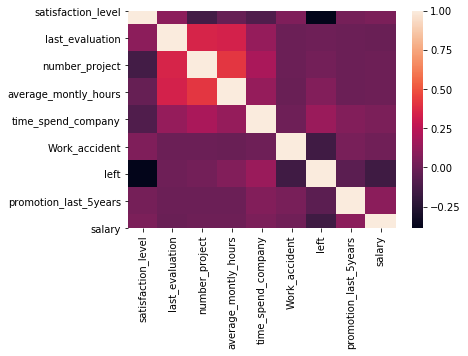

In [12]:
# plotting the correlation matrix
# as seaborn is based on matplotlib, we need to use plt.show() to see the plot
sns.heatmap(turnover.corr())
plt.show()

In [13]:
turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int8
dtypes: float64(2), int64(6), int8(1)
memory usage: 952.2 KB


In [14]:
turnover.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


In [15]:
# joining the departments
turnover = turnover.join(department)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
# the percentage of leavers

turnover['left'].value_counts()/len(turnover)*100

0    76.191746
1    23.808254
Name: left, dtype: float64

In [18]:
turnover['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [20]:
columns = ['satisfaction_level', 'time_spend_company', 'Work_accident', 'salary']
turnover[columns]

,satisfaction_level,time_spend_company,Work_accident,salary
0,0.38,3,0,0
1,0.80,6,0,1
2,0.11,4,0,1
3,0.72,5,0,0
4,0.37,3,0,0
...,...,...,...,...
14994,0.40,3,0,0
14995,0.37,3,0,0
14996,0.37,3,0,0
14997,0.11,4,0,0


In [22]:
turnover.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [28]:
top_feat = ['satisfaction_level', 'time_spend_company']

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score


In [47]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)

gdbr = GradientBoostingClassifier(learning_rate=0.1,
                                 n_estimators=100, random_state=1)

abr = AdaBoostClassifier(DecisionTreeClassifier(), learning_rate=0.1,
                         n_estimators=100, random_state=1)

In [49]:

# y = turnover.pop('left').values
y = y
X = turnover[top_feat].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 10 # number of folds in the cross-validation 
print(cross_val_score(rf, X_train, y_train, cv=k))
print(cross_val_score(gdbr, X_train, y_train, cv=k))
print(cross_val_score(abr, X_train, y_train, cv=k));

[0.94587843 0.96086595 0.94338052 0.94837635 0.9625     0.9441201
 0.94745621 0.95246038 0.95913261 0.96246872]
[0.95087427 0.96003331 0.94671107 0.94920899 0.96333333 0.9499583
 0.94245204 0.95079233 0.96246872 0.96246872]
[0.9450458  0.96253122 0.94421316 0.94837635 0.9625     0.94912427
 0.94829024 0.95329441 0.96080067 0.9616347 ]


In [38]:
import numpy as np
np.unique(y)

array([0, 1])

In [44]:
y_train

array([0, 0, 0, ..., 0, 1, 0])